In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


# display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

In [ ]:

os.makedirs('csv_files', exist_ok=True)


hist_path = '/content/historical_data.csv'
sent_path = '/content/fear_greed_index.csv'



hist = pd.read_csv(hist_path, sep=None, engine='python')
sent = pd.read_csv(sent_path)



print('Historical data rows:', len(hist))
print('Sentiment data rows:', len(sent))
hist.head()

Historical data rows: 102574
Sentiment data rows: 2644


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
hist.columns = [c.strip().lower().replace(' ', '_').replace('\n','_') for c in hist.columns]
sent.columns = [c.strip().lower().replace(' ', '_') for c in sent.columns]

hist = hist.rename(columns={
'account':'account',
'coin':'symbol',
'execution_price':'execution_price',
'size_tokens':'size_tokens',
'size_usd':'size_usd',
'side':'side',
'timestamp_ist':'timestamp_ist',
'start_position':'start_position',
'direction':'direction',
'closed_pnl':'closed_pnl',
'fee':'fee',
})

def try_parse_time(x):
    for fmt in ['%d-%m-%Y %H:%M','%d-%m-%Y %H:%M:%S','%Y-%m-%d %H:%M:%S','%m/%d/%Y %H:%M']:
        try:
            return datetime.strptime(str(x).strip(), fmt)
        except:
            continue
    return pd.NaT

hist['timestamp'] = hist['timestamp_ist'].apply(try_parse_time)

if hist['timestamp'].isna().mean() > 0.3 and hist['timestamp_ist'].dtype in [np.int64, float]:
    hist['timestamp'] = pd.to_datetime(hist['timestamp_ist'], unit='s')

if 'date' in sent.columns:
    sent['date'] = pd.to_datetime(sent['date'])
else:
    if 'timestamp' in sent.columns:
        sent['date'] = pd.to_datetime(sent['timestamp'], unit='s')

sent['classification'] = sent['classification'].astype(str)

hist = hist[~hist['timestamp'].isna()].copy()

hist.head()

,account,symbol,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02 22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02 22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02 22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02 22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02 22:50:00


In [33]:
import pandas as pd
import numpy as np


hist = pd.read_csv("/content/historical_data.csv")
sent = pd.read_csv("/content/fear_greed_index.csv")


hist['date'] = pd.to_datetime(hist['Timestamp IST'], errors='coerce').dt.date
hist['hour'] = pd.to_datetime(hist['Timestamp IST'], errors='coerce').dt.hour


hist = hist.rename(columns={"Closed PnL": "closedPnL"})


for col in ['Execution Price', 'Size USD', 'Size Tokens', 'closedPnL', 'Fee']:
    if col in hist.columns:
        hist[col] = pd.to_numeric(hist[col], errors='coerce')


if 'Side' in hist.columns:
    hist['Side'] = hist['Side'].str.upper().str.strip()


hist['pnl_sign'] = np.where(
    hist['closedPnL'] > 0, 'profit',
    np.where(hist['closedPnL'] < 0, 'loss', 'break_even')
)


daily = hist.groupby('date').agg(
    trades_count=('Account', 'count'),
    total_volume_usd=('Size USD', 'sum'),
    avg_execution_price=('Execution Price', 'mean'),
    median_size_usd=('Size USD', 'median')
).reset_index()


daily2 = hist.groupby('date').apply(lambda df: (df['closedPnL'] > 0).mean()).reset_index(name='win_rate')


daily = daily.merge(daily2, on='date', how='left')



sent['date'] = pd.to_datetime(sent['date'], errors='coerce').dt.date
sent_small = sent[['date', 'classification', 'value']].drop_duplicates(subset=['date'])


daily_sent = daily.merge(sent_small, on='date', how='left')

print("✅ Final merged dataset (daily + sentiment):")
print(daily_sent.head())


✅ Final merged dataset (daily + sentiment):
         date  trades_count  total_volume_usd  avg_execution_price  \
0  2023-01-05             3            477.00          1898.133333   
1  2023-05-12             9          50005.83         11038.300000   
2  2024-01-01            18         264239.53         10373.330667   
3  2024-01-02             6           2008.18             0.076126   
4  2024-01-03           137         472974.70             2.725657   

   median_size_usd  win_rate classification  value  
0          156.390  0.000000           Fear   29.0  
1         1935.950  0.000000        Neutral   49.0  
2         9216.095  0.055556          Greed   65.0  
3          252.115  0.000000          Greed   71.0  
4         1000.870  0.934307          Greed   70.0  


/tmp/ipython-input-1989698752.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily2 = hist.groupby('date').apply(lambda df: (df['closedPnL'] > 0).mean()).reset_index(name='win_rate')


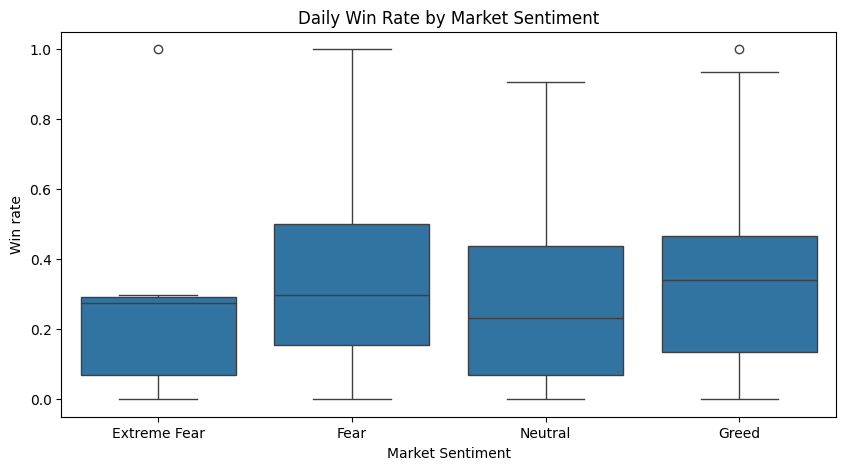

/tmp/ipython-input-455257888.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='classification', y='total_volume_usd', data=daily_sent, estimator=np.sum, ci=None, order=order)


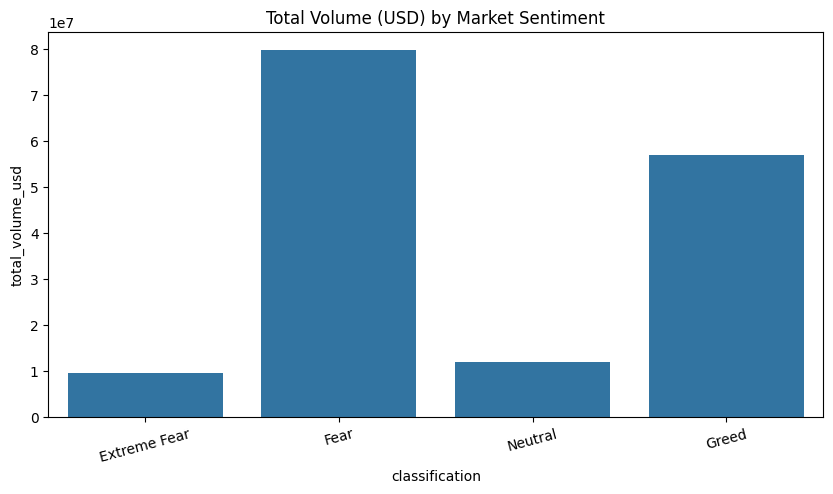

ValueError: Could not interpret value `avg_leverage` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [34]:
plt.figure(figsize=(10,5))
order = ['Extreme Fear','Fear','Neutral','Greed']


sns.boxplot(x='classification', y='win_rate', data=daily_sent, order=order)
plt.title('Daily Win Rate by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Win rate')
plt.savefig('outputs/winrate_by_sentiment.png', bbox_inches='tight')
plt.show()



plt.figure(figsize=(10,5))
sns.barplot(x='classification', y='total_volume_usd', data=daily_sent, estimator=np.sum, ci=None, order=order)
plt.title('Total Volume (USD) by Market Sentiment')
plt.xticks(rotation=15)
plt.savefig('outputs/volume_by_sentiment.png', bbox_inches='tight')
plt.show()



# Removed the scatter plot as 'avg_leverage' column does not exist
# plt.figure(figsize=(10,6))
# sns.scatterplot(data=daily_sent, x='avg_leverage', y='win_rate', hue='classification')
# plt.title('Avg Leverage vs Win Rate (daily)')
# plt.savefig('outputs/leverage_vs_winrate.png', bbox_inches='tight')
# plt.show()

In [ ]:

from scipy.stats import ttest_ind


fear = daily_sent[daily_sent['classification'].str.contains('Fear', na=False)]['win_rate'].dropna()
greed = daily_sent[daily_sent['classification'].str.contains('Greed', na=False)]['win_rate'].dropna()


if len(fear)>5 and len(greed)>5:
  stat, p = ttest_ind(fear, greed, equal_var=False, nan_policy='omit')
  print('t-statistic:', stat, 'p-value:', p)
else:
  print('Not enough samples for t-test; show medians and counts')
  print('fear median:', fear.median(), 'n=', len(fear))
  print('greed median:', greed.median(), 'n=', len(greed))

t-statistic: -0.02703382085867186 p-value: 0.9785054890360187


In [ ]:

acct_vol = hist.groupby('Account').agg(
    total_volume_usd=('Size USD','sum'),
    trades=('Account','count')
).reset_index()


top_accts = acct_vol.sort_values('total_volume_usd', ascending=False).head(10)['Account'].tolist()


acct_perf = hist[hist['Account'].isin(top_accts)].groupby(['Account','date']).agg(
    daily_volume=('Size USD','sum'),
    daily_winrate=('closedPnL', lambda x: (x > 0).mean()),
    avg_execution_price=('Execution Price','mean')
).reset_index()


acct_perf['date'] = pd.to_datetime(acct_perf['date']).dt.date
acct_perf = acct_perf.merge(sent_small, on='date', how='left')

print(acct_perf.head())


                                      Account        date  daily_volume  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-06-12    1212299.96   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11     900880.13   
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-01-03     134360.89   
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-02-02    1858470.00   
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-03-02   19794543.66   

   daily_winrate  avg_execution_price classification  value  
0       0.000000          4041.000000          Greed   72.0  
1       0.000000          3204.461017  Extreme Greed   76.0  
2       0.800000          2262.840000          Greed   74.0  
3       0.900000          3091.970000          Greed   60.0  
4       0.305125          2699.603242           Fear   26.0  


In [ ]:

hist['cum_pnl'] = hist['closedPnL'].cumsum()


acct_cum_pnl = hist.groupby(['Account','date'])['closedPnL'].sum().groupby(level=0).cumsum().reset_index(name='cum_pnl')

print(acct_cum_pnl.head())


                                      Account        date        cum_pnl
0  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-06-12 -175611.000056
1  0x083384f897ee0f19899168e3b1bec365f52a9012  2024-11-11 -175611.000056
2  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-01-03 -166128.778615
3  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-02-02  -89418.778615
4  0x083384f897ee0f19899168e3b1bec365f52a9012  2025-03-02   11592.907049


In [32]:

winrate_sentiment = acct_perf.groupby('classification')['daily_winrate'].mean().reset_index()
print(winrate_sentiment)


  classification  daily_winrate
0   Extreme Fear       0.171703
1  Extreme Greed       0.277299
2           Fear       0.391031
3          Greed       0.414550
4        Neutral       0.356143


In [31]:

leaderboard = hist.groupby('Account').agg(
    total_pnl=('closedPnL','sum'),
    total_volume=('Size USD','sum'),
    trades=('Account','count')
).sort_values('total_pnl', ascending=False).reset_index()

print(leaderboard.head(10))


                                      Account     total_pnl  total_volume  \
0  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06  5.654357e+07   
1  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06  6.169726e+07   
2  0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05  6.803634e+07   
3  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05  4.208766e+08   
4  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05  7.410781e+07   
5  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  6.777471e+05  3.957295e+07   
6  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  4.293556e+05  1.147450e+07   
7  0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05  2.966109e+06   
8  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  4.030115e+05  3.051144e+06   
9  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  3.790954e+05  2.572950e+07   

   trades  
0   14733  
1    3818  
2   21192  
3   12236  
4   40184  
5    4356  
6    1590  
7    1237  
8    1430  
9    9893  


In [30]:

daily_volatility = hist.groupby('date').agg(
    trade_size_volatility=('Size USD','std')
).reset_index()

print(daily_volatility.head())


         date  trade_size_volatility
0  2023-01-05              23.334732
1  2023-05-12            7684.929083
2  2024-01-01           18284.738091
3  2024-01-02             128.051187
4  2024-01-03            7401.570784


In [29]:

daily_pnl = hist.groupby('date')['closedPnL'].sum().reset_index(name='daily_pnl')


daily_pnl = daily_pnl.merge(daily_sent[['date','classification']], on='date', how='left')


sentiment_pnl = daily_pnl.groupby('classification').agg(
    num_days=('date','count'),
    avg_daily_pnl=('daily_pnl','mean'),
    total_pnl=('daily_pnl','sum')
).reset_index()

print(sentiment_pnl)


  classification  num_days  avg_daily_pnl     total_pnl
0   Extreme Fear         6     733.322758  4.399937e+03
1  Extreme Greed        43   26904.504083  1.156894e+06
2           Fear        37   48087.177910  1.779226e+06
3          Greed        56   10886.295226  6.096325e+05
4        Neutral        16    4666.046374  7.465674e+04


In [28]:
os.makedirs('outputs', exist_ok=True)

daily_sent.to_csv('csv_files/daily_sent_summary.csv', index=False)

print('Saved summary and outputs')

Saved summary and outputs
